In [15]:
import pandas as py
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error



In [16]:

# Same data as before
np.random.seed(42)
x = np.random.rand(20, 1) * 10
y = 2.5 * x**2 + 0.5 * x + np.random.randn(20, 1) * 50  # High noise


In [17]:

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [18]:
poly_over = PolynomialFeatures(degree=20)  # TOO COMPLEX!
x_train_over = poly_over.fit_transform(x_train)
x_test_over = poly_over.transform(x_test)

In [19]:
model_over = LinearRegression()
model_over.fit(x_train_over, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_train_pred_over = model_over.predict(x_train_over)
y_test_pred_over = model_over.predict(x_test_over)

In [21]:

print("=" * 50)
print("OVERFITTING MODEL (degree=20)")
print("=" * 50)
print(f"Train R²: {r2_score(y_train, y_train_pred_over):.4f}")
print(f"Test R²:  {r2_score(y_test, y_test_pred_over):.4f}")
print(f"Gap:      {abs(r2_score(y_train, y_train_pred_over) - r2_score(y_test, y_test_pred_over)):.4f}")
print()
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred_over):.2f}")
print(f"Test MSE:  {mean_squared_error(y_test, y_test_pred_over):.2f}")

OVERFITTING MODEL (degree=20)
Train R²: 0.8701
Test R²:  -9885.8739
Gap:      9886.7440

Train MSE: 832.04
Test MSE:  99995391.06


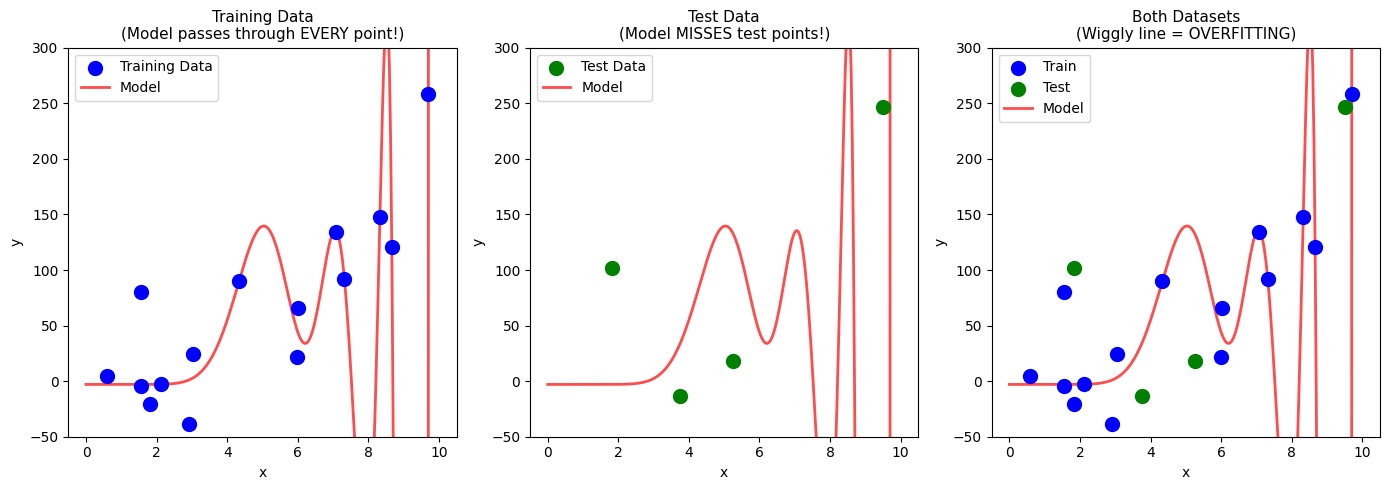

In [22]:
# Visualize the overfitting
x_plot = np.linspace(0, 10, 300).reshape(-1, 1)
x_plot_poly = poly_over.transform(x_plot)
y_plot = model_over.predict(x_plot_poly)

plt.figure(figsize=(14, 5))

# Plot 1: Training data
plt.subplot(1, 3, 1)
plt.scatter(x_train, y_train, s=100, c='blue', label='Training Data', zorder=5)
plt.plot(x_plot, y_plot, 'r-', linewidth=2, label='Model', alpha=0.7)
plt.ylim(-50, 300)
plt.xlim(-0.5, 10.5)
plt.title('Training Data\n(Model passes through EVERY point!)', fontsize=11)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot 2: Test data
plt.subplot(1, 3, 2)
plt.scatter(x_test, y_test, s=100, c='green', label='Test Data', zorder=5)
plt.plot(x_plot, y_plot, 'r-', linewidth=2, label='Model', alpha=0.7)
plt.ylim(-50, 300)
plt.xlim(-0.5, 10.5)
plt.title('Test Data\n(Model MISSES test points!)', fontsize=11)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot 3: Both together
plt.subplot(1, 3, 3)
plt.scatter(x_train, y_train, s=100, c='blue', label='Train', zorder=5)
plt.scatter(x_test, y_test, s=100, c='green', label='Test', zorder=5)
plt.plot(x_plot, y_plot, 'r-', linewidth=2, label='Model', alpha=0.7)
plt.ylim(-50, 300)
plt.xlim(-0.5, 10.5)
plt.title('Both Datasets\n(Wiggly line = OVERFITTING)', fontsize=11)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()